In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class SimpleAdvertisement():
    """ Representation of a simple advertisement."""
    
    def __init__(self, p):
        """
        Constructor. Set p value for the binomial distribution
        that models user click behavior for this advertisement. 
        A p-value represents the odds of a click, 0 <= p <= 1.
        """
        self.p = p

    def show(self):
        """
        Fictitiously show an advertisement. Return a reward:
        either 0 (no click) or 1 (click). Draw just once (n)
        and draw successfully (click) with probability p.
        """
        return np.random.binomial(n=1, p=self.p)

In [ ]:
# Generate the advertisements
advertisement_one = SimpleAdvertisement(0.01)
advertisement_two = SimpleAdvertisement(0.024)
advertisement_three = SimpleAdvertisement(0.03)
advertisements = [advertisement_one, advertisement_two, advertisement_three]

In [ ]:
# Set the scenario's variables
#num_test = 12500, num_prod = 50000
num_tests = 50000
num_prod  = 50000
num_ads = len(advertisements)
average_rewards_over_time = []
N_impres = np.zeros(num_ads, dtype=int)
Q_values = np.zeros(num_ads)
reward_sum = 0

In [ ]:
def a_b_n_test(num_test, ads):
    """ Run A/B/n testing phase. """
    global reward_sum
    # Iterate over the test range.
    for test in range(num_test):
        # Pick an advertisement at random.
        chosen_ad_idx = np.random.randint(len(ads))
        chosen_ad = ads[chosen_ad_idx]
        # Observe reward for advertisement [click = 1, no click = 0]
        reward = chosen_ad.show()
        # Increase counter for ad and Q/action value
        N_impres[chosen_ad_idx] = N_impres[chosen_ad_idx] + 1
        Q_values[chosen_ad_idx] += (1 / N_impres[chosen_ad_idx]) * (reward- Q_values[chosen_ad_idx])
        # Increase total reward
        reward_sum += reward
        average_reward_so_far = reward_sum / (test + 1)
        average_rewards_over_time.append(average_reward_so_far)

In [ ]:
def a_b_n_prod(num_prod, best_ad):
    """ Run the best ad in production. """
    global reward_sum
    # Iterate over the test range.
    for prod in range(num_prod):
        # Observe reward for advertisement [click = 1, no click = 0]
        reward = best_ad.show()
        # Increase total reward
        reward_sum += reward
        average_reward_so_far = reward_sum / (prod + num_tests + 1)
        average_rewards_over_time.append(average_reward_so_far)

In [ ]:
def plot_phases(selected_ad, selected_ad_score):
    """
    Plot the reward for the exploration and exploitation phases.
    """
    plt.plot(average_rewards_over_time)
    plt.axvline(x=num_tests, linestyle='--', color='gray') # Plot vertical line at cutoff for exploration
    plt.text(num_tests-6000, 0, 'Exploration', color='gray')
    plt.text(num_tests+2000, 0, 'Exploitation', color='gray')
    plt.title(f"Average reward over time - Selected ad {selected_ad} (score: {selected_ad_score}) - Best ad: 3 (score: 0.03)")
    plt.show()

Best-performing advertisement after exploration is Ad 3
Score board:
> Ad 1 - 0.01055155875299759
> Ad 2 - 0.02408389732333402
> Ad 3 - 0.03185767480347529
Global average reward over time: 0.02621


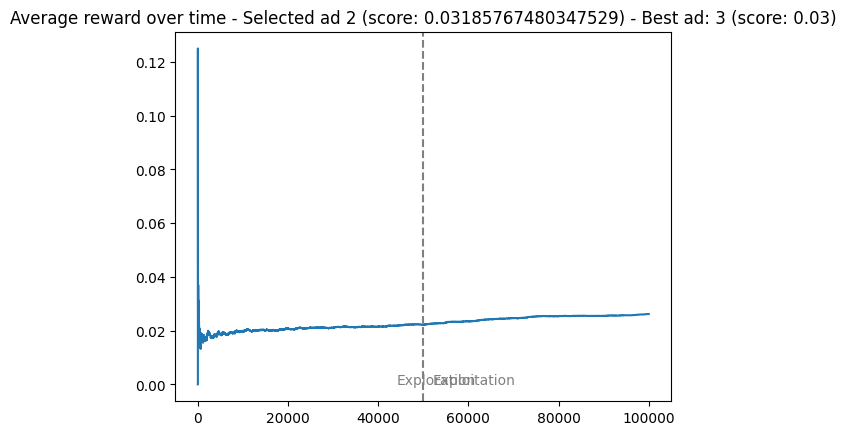

In [ ]:
def ad_scenario():
    """
    Run an advertisement based A/B/n Multi-Armed Bandit scenario.
    Select the best out of three ads, specified above, then run
    in production. The proper ad was chosen if the average reward
    over time approximates the highest p value (0.03) chosen 
    with the advertisements at the top of this code.
    """
    # 1. Run A/B/n test (exploration) on advertisements
    a_b_n_test(num_tests, advertisements)
    # 2. Pick best ad after testing
    best_ad_index = np.argmax(Q_values)
    print("="*50)
    print(f"Best-performing advertisement after exploration is Ad {best_ad_index+1}")
    print("="*50)
    print(f"Score board:")
    for i in range(len(advertisements)):
        print(f"> Ad {i+1} - {Q_values[i]}")
    print("="*50)
    # 3. Run the ad in production
    a_b_n_prod(num_prod, advertisements[best_ad_index])
    # 4. Print overall ad performance
    print(f"Global average reward over time: {average_rewards_over_time[-1]}")
    print("="*50)
    # 5. Plot the performance
    plot_phases(best_ad_index, Q_values[best_ad_index])



if __name__ == '__main__':
    ad_scenario()